In [1]:
#lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [15]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## Getting the Classified data

In [3]:
data = pd.read_csv('data/KNN_Project_Data')

In [4]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
#quick checking the dataType
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
#checking the describe method
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [7]:
#Getting a quick co-relation

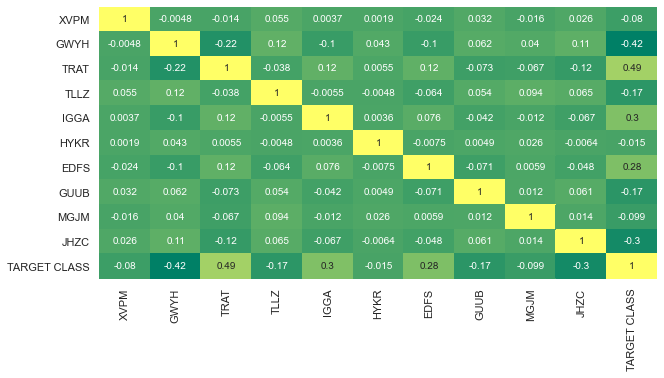

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='summer',cbar=False,annot=True);

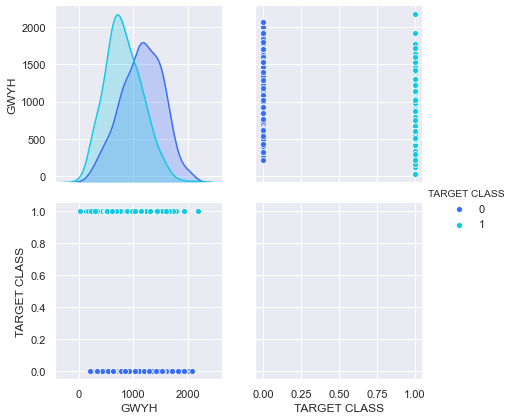

In [22]:
#checking the pairplot of seaborn

sns.pairplot(data[['GWYH','TARGET CLASS']],hue='TARGET CLASS',height=3);

#### Feature and Target

In [25]:
feature_x = data.drop('TARGET CLASS',axis=1)
target_y = data['TARGET CLASS']

### Standardize 

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()


In [28]:
#fit
scaler.fit(feature_x)

StandardScaler()

##### Transform

In [29]:
scaled_feature = scaler.transform(feature_x)

In [30]:
scaled_feature

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [31]:
#creating new DF for scaled data

In [32]:
scaled_df = pd.DataFrame(scaled_feature,columns=feature_x.columns)

In [36]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


#### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(scaled_df,target_y,test_size=0.2,random_state=123)

In [39]:
x_train.shape,y_train.shape

((800, 10), (800,))

In [40]:
x_test.shape, y_test.shape

((200, 10), (200,))

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf = KNeighborsClassifier(n_neighbors=1)

##### Fit

In [43]:
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
clf.score(x_test,y_test)

0.755

#### Creating Confusion Matrix and Classification Report

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
y_preds = clf.predict(x_test)

##### Confusion matrix

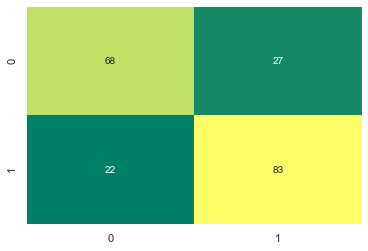

In [49]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,cmap='summer');

##### CLassification Report 

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        95
           1       0.75      0.79      0.77       105

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



#### Elbow Method

In [52]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    i_preds = knn.predict(x_test)
    
    error_rate.append(np.mean(i_preds != y_test))
    

##### PLOT

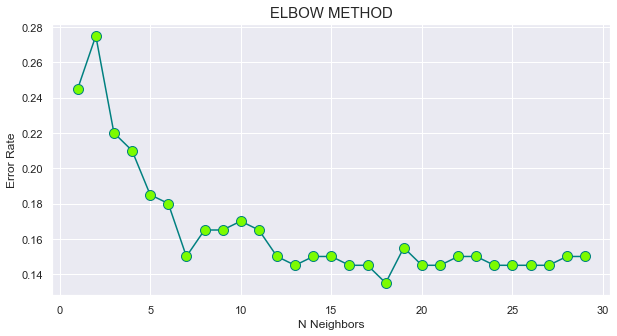

In [53]:
plt.figure(figsize=(10,5))

plt.plot(range(1,30),error_rate,color='teal',marker='o',markerfacecolor='lawngreen',markersize=10)

plt.title('ELBOW METHOD',fontsize=15)
plt.xlabel('N Neighbors',fontsize=12)
plt.ylabel('Error Rate',fontsize=12)

plt.show()

In [54]:
#### Working with new n_neighbors =18

In [55]:
model = KNeighborsClassifier(n_neighbors=18)

model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [56]:
model.score(x_test,y_test)

0.865

### Checking with new confusion matrix and Classification report

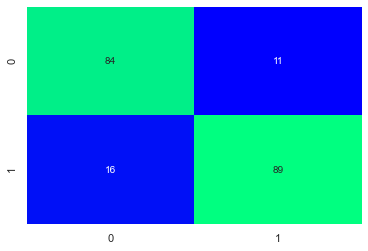

In [58]:
y2_preds = model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y2_preds),annot=True,cbar=False,cmap='winter');

In [59]:
#### New classification report

In [60]:
print(classification_report(y_test,y2_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        95
           1       0.89      0.85      0.87       105

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



In [61]:
## old one
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        95
           1       0.75      0.79      0.77       105

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

